# Linear Regression with Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data (column 1: city population in 10,000 and column2: profit in that city in 10,000)

data = np.loadtxt("data/profit.txt", dtype='float', delimiter=",")

In [3]:
# show first n rows
# print number of rows and columns

number_of_rows = 5
print(f"First {number_of_rows} rows: \n {data[0:5,:]}\n")
print(f"Shape of data: {data.shape}")

First 5 rows: 
 [[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]

Shape of data: (97, 2)


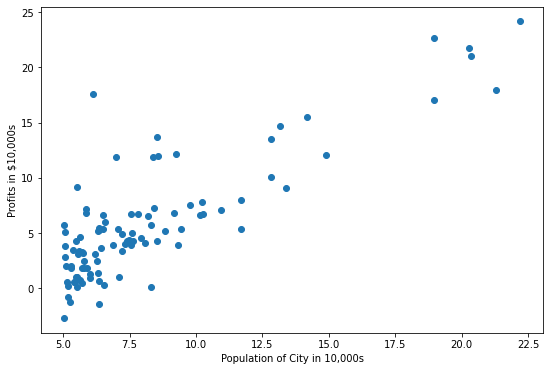

In [4]:
# Plot the city's population against the profit

X = data[:,0]
y = data[:,1].reshape(-1,1)

figure = plt.figure(figsize=(9, 6))
plt.scatter(X, y)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profits in $10,000s")
plt.show()

In [5]:
m = X.shape[0] # get the number of features (training examples)
X = np.concatenate((np.ones((m, 1)), data[:,0].reshape(-1,1)), axis=1) # Add a columns of 1 for the bias term
print(f"Feature matrix (shape: {X.shape}): \n {X[0:number_of_rows, :]} \n") # print the new X matrix

theta = np.zeros((2,1)) # Initialize the theta matrix with zeros
print(f"theta vector (shape: {theta.shape}): \n {theta}")


Feature matrix (shape: (97, 2)): 
 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]] 

theta vector (shape: (2, 1)): 
 [[0.]
 [0.]]


### Compute the Cost Function J($\theta$)

In [6]:
def compute_cost(X, y, theta):
    
    '''
        This function computes the cost function J
        Inputs:
            X: feature matrix of size (m, n) where m is the number of examples (rows)
                and n the number of features (columns)            
            y: y lables matrix of size (m, 1) where m is the number of examples            
            theta: weight matrix of size (n, 1) where n is the number of weights (which is equal to the number of features)    
    '''
    
    m = X.shape[0]
    y_hat = np.dot(X,theta)
    squared_errors = np.power((y_hat - y), 2)
    
    J = np.sum(squared_errors) / (2 * m)
    
    return J
    

In [7]:
# Test the computeCost Function

print(f"Cost with theta as a matrix with zeros as weights: {compute_cost(X, y, theta)}")
print(f"Cost with theta as a matrix with non zeros as weights: {compute_cost(X, y, np.array([[-1],[ 2]]))}")

Cost with theta as a matrix with zeros as weights: 32.072733877455676
Cost with theta as a matrix with non zeros as weights: 54.24245508201238


### Gradient Descent

In [8]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    
    m = X.shape[0]
    costs = np.zeros((num_iterations, 1))
    
    for i in range(num_iterations):
        y_hat = X.dot(theta)
        y_diff = y_hat - y
    
        delta = np.dot(X.T, y_diff) / m
    
        theta = theta - (learning_rate * delta)
        
        costs[i] = compute_cost(X, y, theta)
    
    return {"theta": theta, "costs": costs}
    

### Run Gradient Descent

theta:
 [[-3.63029144]
 [ 1.16636235]]


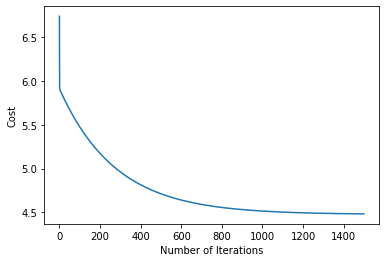

In [9]:
learning_rate = 0.01
num_iterations = 1500

results = gradient_descent(X, y, theta, learning_rate, num_iterations)
costs = results["costs"]

print(f"theta:\n {results['theta']}")

plt.plot(costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [10]:
def best_fit_line(X, y):

    xbar = sum(X)/len(X)
    ybar = sum(y)/len(y)
    n = len(X) 

    numer = sum(xi*yi for xi,yi in zip(X, y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    #print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

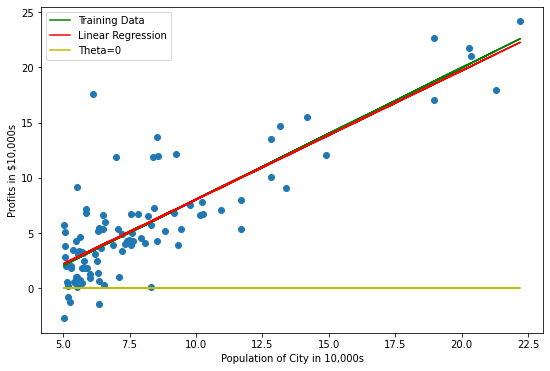

In [11]:
# Plot best fitting line

y_theta_zeros = np.dot(X, theta)
y_pred = np.dot(X, results["theta"])

a_real, b_real = best_fit_line(X[:,1], y.reshape(y.shape[0]))
a_pred, b_pred = best_fit_line(X[:,1], y_pred.reshape(y_pred.shape[0]))
a_theta_z, b_theta_z = best_fit_line(X[:,1], y_theta_zeros.reshape(y_theta_zeros.shape[0]))


y_fit_real = [a_real + b_real * xi for xi in X[:,1]]
y_fit_pred = [a_pred + b_pred * xi for xi in X[:,1]]
y_fit_theta_z = [a_theta_z + b_theta_z * xi for xi in X[:,1]]

figure = plt.figure(figsize=(9, 6))
plt.scatter(X[:,1].reshape(-1,1), y)
plt.plot(X[:,1], y_fit_real, "g", label='Training Data')
plt.plot(X[:,1], y_fit_pred, "r", label='Linear Regression')
plt.plot(X[:,1], y_fit_theta_z, "y", label='Theta=0')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profits in $10,000s")
plt.legend()
plt.show()